<a href="https://colab.research.google.com/github/w1767/w1767/blob/main/Apple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: this program uses an aritificial recurrent neural network called Long Short Term Memory (LSTM) to predict
# the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price. 

In [ ]:
# Import the libraries
!pip install pandas_datareader
!pip install yfinance
!pip install mplfinance
import os
import argparse
import signal
import yfinance as yf
import pickle
import mplfinance as mpf
import math
import pandas_datareader.data as web
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
#from yfinance import stock_info
from dateutil.parser import parse
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
start_date = datetime(2020, 1,1)
end_date = datetime(2021, 8, 2)


     |████████████████████████████████| 6.3 MB 8.1 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=8c1f055a5bafbe8077d284c05bf58dc6b65731e1db86bba8936cd4e6d88ad232
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
     |████████████████████████████████| 62 kB 750 kB/s 


In [ ]:
#Get the stock quote
data = yf.download('AAPL', start=start_date, end=end_date)
#df = web.DataReader('AAPL', data_source='yahoo',start='2012-01',end='2019-12-17')
#show the data
data.head(391)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,74.207466,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,73.486023,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,74.071579,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.723213,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.909149,132079200
...,...,...,...,...,...,...
2021-07-15,149.240005,150.000000,147.089996,148.479996,148.479996,106820300
2021-07-16,148.460007,149.759995,145.880005,146.389999,146.389999,93100300
2021-07-19,143.750000,144.070007,141.669998,142.449997,142.449997,121434600


In [ ]:
#Get the number of rows and columns in the data set
data.shape



(398, 6)

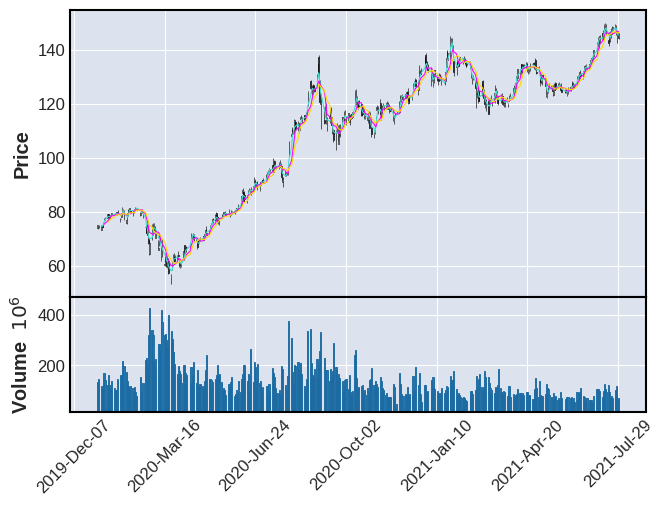

In [ ]:
mpf.plot(data, type='candle', mav= (3,6,9), volume=True, show_nontrading=True)
#Visualize the closing price history
#plt.figure(figsize=(16,8))
#plt.title('Close Price History')
#plt.plot(df['Close'])
#plt.xlabel('Date',fontsize=18)
#plt.ylabel('Close Price USD($)',fontsize=18)
#plt.show()

In [ ]:
#Create a new dataframe with only the 'Close column'
data = data.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

319

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data



array([[0.20412115],
       [0.1962765 ],
       [0.20264352],
       [0.19885561],
       [0.21175083],
       [0.22905197],
       [0.23093248],
       [0.24874406],
       [0.23724579],
       [0.23364588],
       [0.24412326],
       [0.25349924],
       [0.24769636],
       [0.25073213],
       [0.25484249],
       [0.25237087],
       [0.22722516],
       [0.25070524],
       [0.26857052],
       [0.26730786],
       [0.2287296 ],
       [0.22644605],
       [0.2538216 ],
       [0.26080655],
       [0.27090778],
       [0.25699167],
       [0.26107514],
       [0.2558633 ],
       [0.27625399],
       [0.26999437],
       [0.27020934],
       [0.25422457],
       [0.26663623],
       [0.257717  ],
       [0.23823979],
       [0.19829138],
       [0.1711576 ],
       [0.18343498],
       [0.13204201],
       [0.13161216],
       [0.1999839 ],
       [0.17448893],
       [0.21054187],
       [0.18416039],
       [0.17370982],
       [0.11229622],
       [0.16379659],
       [0.137

In [ ]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i <= 60:
    print (x_train)
    print (y_train)
    print ()

[array([0.20412115, 0.1962765 , 0.20264352, 0.19885561, 0.21175083,
       0.22905197, 0.23093248, 0.24874406, 0.23724579, 0.23364588,
       0.24412326, 0.25349924, 0.24769636, 0.25073213, 0.25484249,
       0.25237087, 0.22722516, 0.25070524, 0.26857052, 0.26730786,
       0.2287296 , 0.22644605, 0.2538216 , 0.26080655, 0.27090778,
       0.25699167, 0.26107514, 0.2558633 , 0.27625399, 0.26999437,
       0.27020934, 0.25422457, 0.26663623, 0.257717  , 0.23823979,
       0.19829138, 0.1711576 , 0.18343498, 0.13204201, 0.13161216,
       0.1999839 , 0.17448893, 0.21054187, 0.18416039, 0.17370982,
       0.11229622, 0.16379659, 0.13717325, 0.06410016, 0.14399702,
       0.04792739, 0.07653872, 0.05990921, 0.0548317 , 0.01308334,
       0.        , 0.06047339, 0.05681974, 0.09152946, 0.06278379])]
[0.08177740654600985]



In [ ]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(259, 60, 1)

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))



In [ ]:
#Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

259/259 [==============================] - 26s 25ms/step - loss: 0.0224


In [ ]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)



In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [ ]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

1.0435009726995155

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


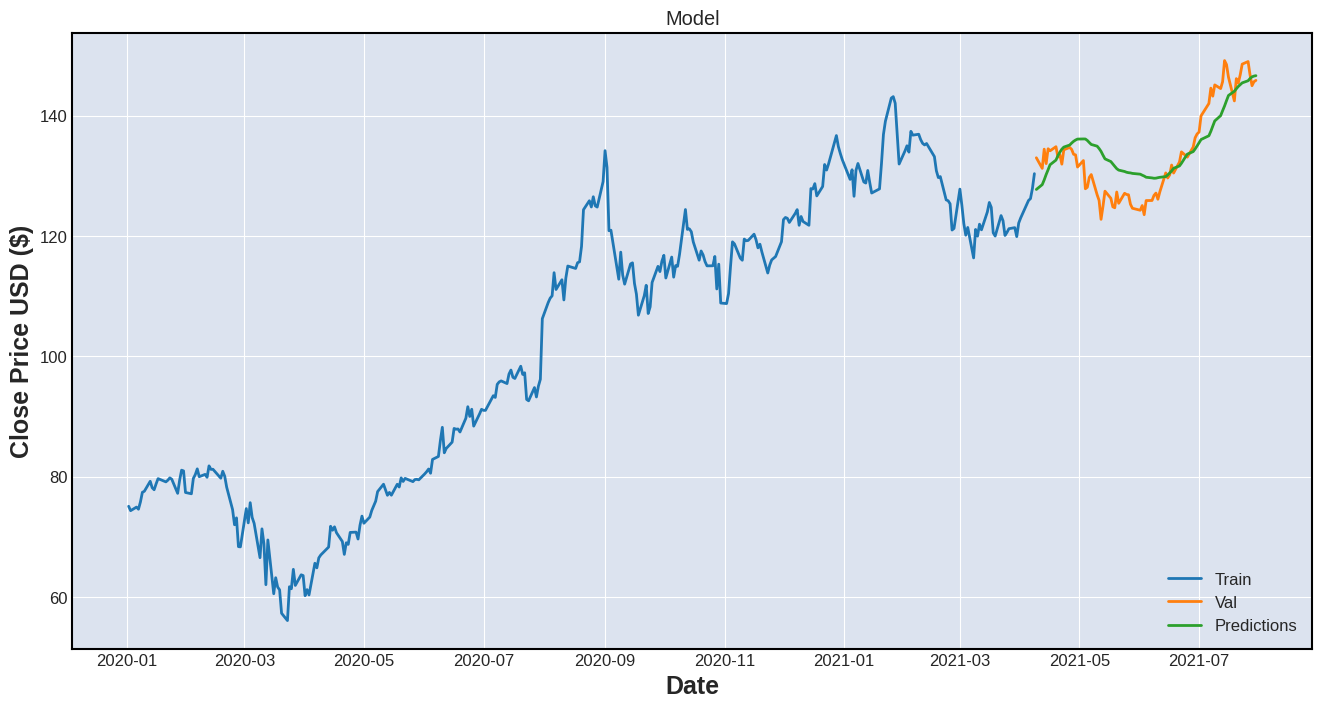

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [ ]:
#show the valid and predicted return
valid

,Close,Predictions
Date,,
2021-04-09,133.000000,127.736870
2021-04-12,131.240005,128.533829
2021-04-13,134.429993,129.321732
2021-04-14,132.029999,130.218948
2021-04-15,134.500000,131.019165
...,...,...
2021-07-26,148.990005,145.798294
2021-07-27,146.770004,146.173660
2021-07-28,144.979996,146.445923


In [ ]:
#get the quote
apple_quote = yf.download('AAPL', start=start_date, end=end_date)
#Create a new dataframe
new_data = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_data[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[*********************100%***********************]  1 of 1 completed
[[146.6766]]
